# Exploring Dandiset 001174: Calcium Imaging in SMA and M1 of Macaques

*This notebook was generated with the assistance of AI. Please use caution when interpreting the code or results, and consult the official documentation for the most up-to-date practices.*

## Overview

[Dandiset 001174: Calcium imaging in SMA and M1 of macaques](https://dandiarchive.org/dandiset/001174/0.250331.2218) contains calcium imaging data acquired from rhesus macaque motor cortices. Specifically, neuronal population activity was recorded in the Supplementary Motor Area (SMA) and Primary Motor Cortex (M1) using one-photon miniature endoscopic microscopy during rest and arm-reaching tasks.

The dataset provides:
- High-resolution in vivo imaging data for populations of individually identified projection neurons.
- Segmented regions of interest (ROIs) corresponding to single cells and their spatial footprints.
- Processed fluorescence traces and neural event amplitudes for each cell.

## This Notebook Covers:

1. **Getting started with the DANDI API**: Finding and loading assets.
2. **Accessing data remotely via streaming**: Opening NWB files without downloading.
3. **Understanding the NWB file structure**: Exploring imaging, ROI, and fluorescence data.
4. **Basic visualization**: Thumbnail images, ROI masks, and single-cell fluorescence traces.

## Required Packages
- `dandi`
- `remfile`
- `pynwb`
- `h5py`
- `numpy`
- `matplotlib`
- `pandas`

*All needed packages are assumed to be pre-installed.*

## 1. Using the DANDI API to List and Access Assets

This section demonstrates how to use the DANDI API to list the files associated with Dandiset 001174 and retrieve streaming URLs for NWB files of interest.

In [1]:
from dandi.dandiapi import DandiAPIClient

# Initialize the DANDI API client and select the dandiset version
dandiset_id = "001174"
dandiset_version = "0.250331.2218"

with DandiAPIClient() as client:
    dandiset = client.get_dandiset(dandiset_id, dandiset_version)
    # List the available NWB files
    asset_paths = [a.path for a in dandiset.get_assets()]
    print(f"Found {len(asset_paths)} assets in Dandiset {dandiset_id}:")
    for path in asset_paths:
        if path.endswith('.nwb'):
            print("-", path)

Found 45 assets in Dandiset 001174:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb
- sub-Q/sub-Q_ophys.nwb
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb
- sub-Q/sub-Q_ses-20221201T132256_ophys.nwb
- sub-Q/sub-Q_ses-20221202T122907_ophys.nwb
- sub-Q/sub-Q_ses-20221206T121002_ophys.nwb
- sub-Q/sub-Q_ses-20220915T133954_ophys.nwb
- sub-Q/sub-Q_ses-20221201T134628_ophys.nwb
- sub-Q/sub-Q_ses-20221028T123313_ophys.nwb
- sub-Q/sub-Q_ses-20220922T133032_ophys.nwb
- sub-Q/sub-Q_ses-20221003T134805_ophys.nwb
- sub-Q/sub-Q_ses-20221202T125146_ophys.nwb
- sub-Q/sub-Q_ses-20221206T123719_ophys.nwb
- sub-V/sub-V_ses-20230316T094035_ophys.nwb
- sub-V/sub-V_ses-20230309T104556_ophys.nwb
- sub-F/sub-F_ses-20240213T110430_ophys.nwb
- sub-U/sub-U_ses-20230224T122552_ophys.nwb
- sub-U/sub-U_ses-20230301T112849_ophys.nwb
- sub-U/sub-U_ses-20230227T153955_ophys.nwb
- sub-U/sub-U_ses-20230307T120713_ophys.nwb
- sub-U/sub-U_se

For the purpose of this demonstration, we will work with one NWB file:

```
sub-V/sub-V_ses-20230309T110929_ophys.nwb
```

This file contains calcium imaging data from the M1 region during an arm reaching condition.

## 2. Streaming and Loading an NWB File from DANDI

We will now access the NWB file remotely and explore its contents. This approach avoids having to download large files before analysis.

In [2]:
import remfile
import h5py
import pynwb

# Select a specific asset/file of interest
target_nwb_path = "sub-V/sub-V_ses-20230309T110929_ophys.nwb"

# Get the download URL for the remote NWB file
with DandiAPIClient() as client:
    dandiset = client.get_dandiset(dandiset_id, dandiset_version)
    asset = next(dandiset.get_assets_by_glob(target_nwb_path))
    url = asset.download_url

# Open the remote file via remfile and h5py
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)

# Load NWB using pynwb
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwbfile = io.read()

print(f"Session description: {nwbfile.session_description}")
print(f"Session start time: {nwbfile.session_start_time}")
print(f"Subject ID: {nwbfile.subject.subject_id}, Age: {nwbfile.subject.age}, Species: {nwbfile.subject.species}")

Session description: Calcium imaging in M1 during the arm reaching condition
Session start time: 2023-03-09 11:09:29.585000+00:00
Subject ID: V, Age: P4Y, Species: Macaca mulatta


## 3. Exploring NWB File Structure

The file contains the following main elements of interest:

- **Acquisition → OnePhotonSeries**: Raw miniscope imaging data (fluorescence movies).
- **Processing → ophys**: 
    - **Fluorescence → RoiResponseSeries**: Processed fluorescence traces for each ROI (cell).
    - **EventAmplitude**: Amplitude of detected neural events for each ROI.
    - **ImageSegmentation → PlaneSegmentation**: Image masks (spatial footprints) for each ROI/cell.

Let's explore the structure more closely.

In [3]:
# Show acquisition keys and some metadata from the OnePhotonSeries
acq = nwbfile.acquisition
print("Acquisition keys:", list(acq.keys()))

ophys_series = acq["OnePhotonSeries"]
print("\nOnePhotonSeries:")
print("  Data shape (frames, height, width):", ophys_series.data.shape)
print("  Imaging rate (Hz):", ophys_series.rate)
print("  Unit:", ophys_series.unit)
print("  Description:", ophys_series.description)

Acquisition keys: ['OnePhotonSeries']

OnePhotonSeries:
  Data shape (frames, height, width): (5185, 1280, 800)
  Imaging rate (Hz): 10.0
  Unit: fluorescence
  Description: Miniscope imaging data


## 4. Summarizing ROIs and Fluorescence Data

We now inspect the processed data structure, which includes ROI masks and fluorescence traces.

In [4]:
# Access processing module and ophys data
ophys_module = nwbfile.processing["ophys"]
fluorescence = ophys_module.data_interfaces["Fluorescence"]
event_amplitude = ophys_module.data_interfaces["EventAmplitude"]

# Get ROI information
roi_table = fluorescence.roi_response_series["RoiResponseSeries"].rois.table
roi_df = roi_table.to_dataframe()
print(f"Number of segmented ROIs (cells): {len(roi_df)}")

# Show the first few ROI indices
print(roi_df.head())

Number of segmented ROIs (cells): 11
                                           image_mask
id                                                   
0   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...


## 5. Plotting a Thumbnail and Example ROI Masks

We'll plot a single movie frame as a thumbnail, overlaying ROI masks on top to show cell locations.

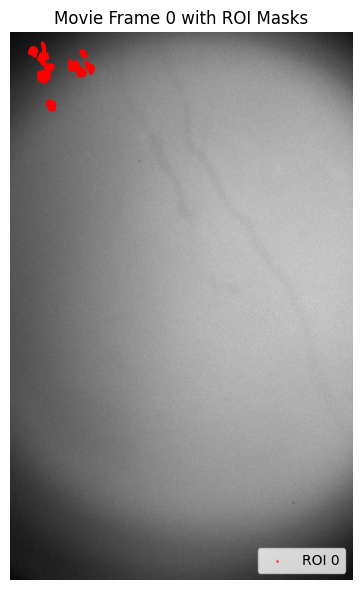

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Read the first frame of the imaging data
frame0 = np.array(ophys_series.data[0])

fig, ax = plt.subplots(figsize=(8,6))
ax.imshow(frame0, cmap='gray')
ax.set_title("Movie Frame 0 with ROI Masks")
ax.axis('off')

# Overlay the ROI masks outlines
# Some NWB image_mask arrays are [height, width], here each ROI is likely a binary mask
for idx, row in roi_df.iterrows():
    mask = np.array(row['image_mask'])
    # contour: plot mask outline if not empty
    if mask.sum() > 0:
        y,x = np.where(mask)
        ax.scatter(x, y, s=0.5, alpha=0.8, label=f"ROI {idx}" if idx < 1 else "", c='r')

# Only label the first ROI in legend to avoid clutter
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()

## 6. Visualizing Fluorescence Traces from Multiple Cells

Each ROI/cell is associated with a time series of fluorescence intensities. Let's plot traces from the first few cells.

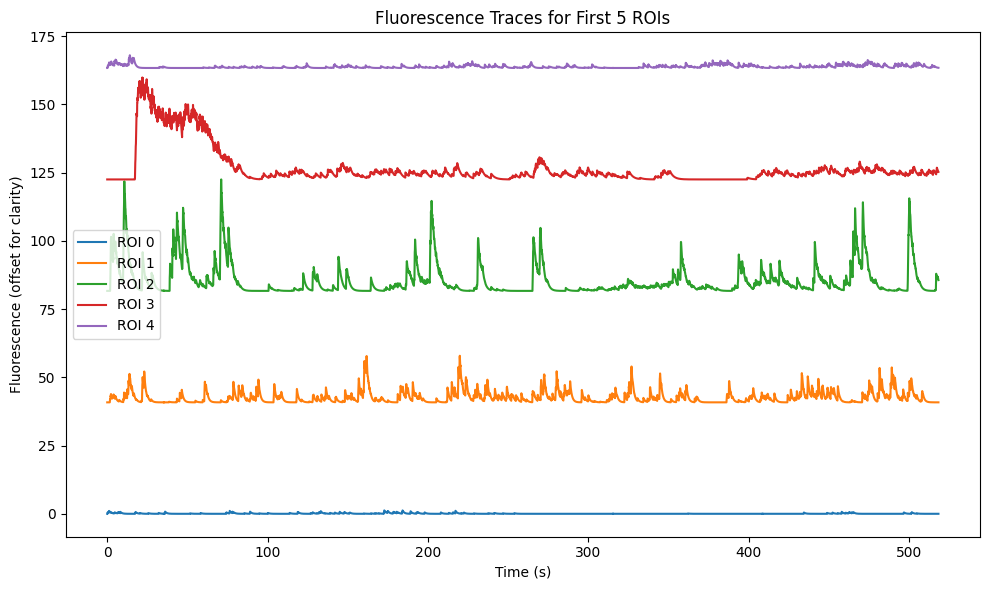

In [6]:
# Extract fluorescence data for all ROIs
fluor = fluorescence.roi_response_series["RoiResponseSeries"].data[:]
times = np.arange(fluor.shape[0]) / fluorescence.roi_response_series["RoiResponseSeries"].rate

# Plot fluorescence for first 5 ROIs
n_plot = min(5, fluor.shape[1])
fig, ax = plt.subplots(figsize=(10,6))
for i in range(n_plot):
    ax.plot(times, fluor[:,i] + i*np.nanmax(fluor[:, :n_plot]), label=f"ROI {i}")

ax.set_xlabel("Time (s)")
ax.set_ylabel("Fluorescence (offset for clarity)")
ax.set_title("Fluorescence Traces for First 5 ROIs")
ax.legend()
plt.tight_layout()
plt.show()

## 7. Event Amplitude Traces

The NWB also provides event amplitudes, reflecting the intensity of detected calcium events (peaks) in each cell.

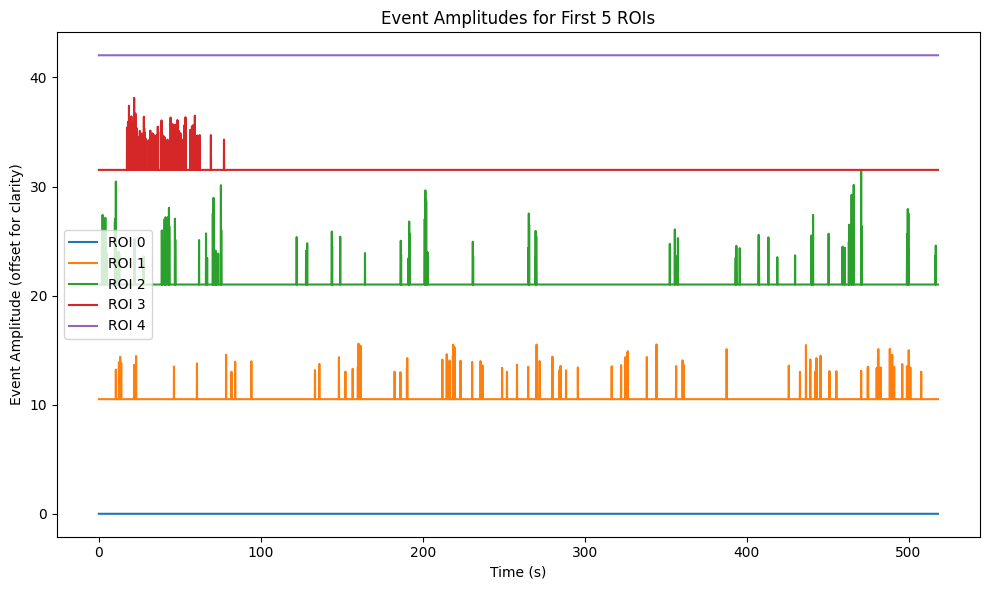

In [7]:
# Extract event amplitude data for same ROIs as above
event_amp = event_amplitude.data[:]
times_evt = np.arange(event_amp.shape[0]) / event_amplitude.rate

fig, ax = plt.subplots(figsize=(10,6))
for i in range(n_plot):
    ax.plot(times_evt, event_amp[:,i] + i*np.nanmax(event_amp[:, :n_plot]), label=f"ROI {i}")

ax.set_xlabel("Time (s)")
ax.set_ylabel("Event Amplitude (offset for clarity)")
ax.set_title("Event Amplitudes for First 5 ROIs")
ax.legend()
plt.tight_layout()
plt.show()

## 8. Tips for Further Exploration

- Each NWB file in the Dandiset follows a similar structure; you can easily adapt the above code to select other sessions or subjects.
- The full movie is accessible as `OnePhotonSeries.data` (large, be mindful of memory use).
- The spatial footprint masks of ROIs are 2D arrays; you can use them to extract morphological statistics, overlap, or anatomical placements.
- The `EventAmplitude` and `RoiResponseSeries` offer different approaches to analyzing cellular activity.

**Example questions to explore:**
- How do cell activity patterns vary across behavioral conditions or cortical areas?
- What is the spatial arrangement and correlation structure among ROIs?
- Can you extract population events or sequences from the activity traces?

See [the associated BioRxiv preprint](https://www.biorxiv.org/content/10.1101/2024.06.20.599918v3) for more information on the acquisition and analysis performed.

---

*You are now set up to begin your own exploration and reanalysis of Dandiset 001174!*